In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
random_cat_img = cv2.imread('CATS_DOGS/train/CAT/3.jpg')

In [3]:
random_cat_img = cv2.cvtColor(random_cat_img,cv2.COLOR_BGR2RGB)

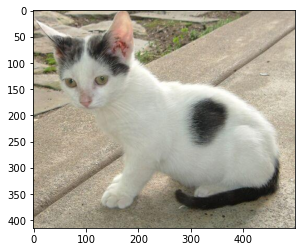

In [4]:
plt.imshow(random_cat_img)

In [5]:
random_cat_img.shape

(415, 500, 3)

In [6]:
random_dog_img = cv2.imread('CATS_DOGS/train/DOG/5.jpg')

In [7]:
random_dog_img = cv2.cvtColor(random_dog_img,cv2.COLOR_BGR2RGB)

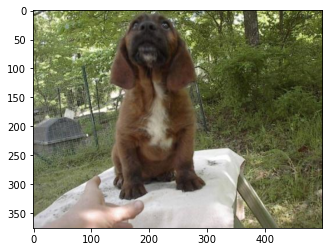

In [8]:
plt.imshow(random_dog_img)

In [9]:
random_dog_img.shape

(376, 500, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
random_dog_img.max()

255

In [12]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,
                               height_shift_range=0.1,rescale=1/255,
                               shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                              fill_mode='nearest')

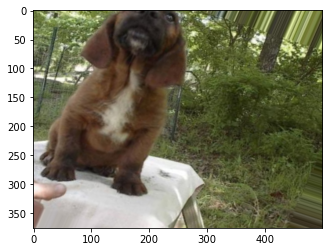

In [13]:
plt.imshow(image_gen.random_transform(random_dog_img))

In [14]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [15]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
input_shape = (150,150,3)

In [17]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [19]:
batch_size = 16

In [20]:
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',target_size=input_shape[:2],
                                                batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [21]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',target_size=input_shape[:2],
                                                batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [23]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
150/150 [==============================] - 146s 972ms/step - loss: 0.6988 - accuracy: 0.5054 - val_loss: 0.6929 - val_accuracy: 0.5573
Epoch 2/100
150/150 [==============================] - 139s 925ms/step - loss: 0.6948 - accuracy: 0.4900 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/100
150/150 [==============================] - 112s 746ms/step - loss: 0.6919 - accuracy: 0.5358 - val_loss: 0.6828 - val_accuracy: 0.5052
Epoch 4/100
150/150 [==============================] - 117s 782ms/step - loss: 0.6894 - accuracy: 0.5345 - val_loss: 0.6916 - val_accuracy: 0.5417
Epoch 5/100
148/150 [============================>.] - ETA: 1s - loss: 0.6901 - accuracy: 0.5359

KeyboardInterrupt: 

In [ ]:
results.history['acc']